In [27]:
import numpy as np
from kmodes.kmodes import KModes
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random

random.seed(5)

%matplotlib inline

In [28]:
df=pd.read_csv("data/report_anonymous_clean.csv", sep=";", encoding = 'utf8')

# drop cols 'Unnamed 0'
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [29]:
df.columns

Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')

In [37]:
columns = ['ETA_PRELIEVO','GRAVIDANZE','ABORTI','PERDITE_ER',
           'LEUCORREA','PRURITO','MENOPAUSA','CITO', 'CITO_PREC']

df_cl = df[columns].copy()

df_cl['CITO'] = df_cl['CITO'].apply(lambda x: 'NEGATIVO' if x == 'NEGATIVO' else 'POSITIVO')
df_cl['CITO_PREC'] = df_cl['CITO_PREC'].apply(lambda x: 'NEGATIVO' if x == 'NEGATIVO' else 'POSITIVO')
df_cl['GRAVIDANZE'] = df_cl['GRAVIDANZE'].apply(lambda x: 'False' if x == 0 else 'True')
df_cl['ABORTI'] = df_cl['ABORTI'].apply(lambda x: 'False' if x == 0 else 'True')

df_cl['ETA_PRELIEVO'] = pd.cut(df_cl['ETA_PRELIEVO'], [10,35,55,75,90],\
                               labels=['10-35','35-55','55-75','75-90'])

df_cl.dropna(inplace=True)
df_cl = df_cl.applymap(str)

print(len(df_cl))

8804


In [31]:
def kmode_cluster(size, method):
    km = KModes(n_clusters=size, init=method, verbose=0)
    clusters = km.fit_predict(df_cl)
    return km

In [32]:
size = 20
costs = {i: 0 for i in range(2,size+1)}

for i in range(2,size+1):
    print("clustering with {} centroids...".format(i))
    km = kmode_cluster(i, 'Huang') #Cao, Huang
    df_cl['CLUSTER'] = km.labels_
    print(km.cluster_centroids_)
    print("cost: ",km.cost_)
    costs[i] = km.cost_
    print()

clustering with 2 centroids...
[['45-55' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO']
 ['35-45' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO']]
cost:  11318.0

clustering with 3 centroids...
[['45-55' 'True' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'NEGATIVO' '0']
 ['35-45' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '1']
 ['25-35' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '0']]
cost:  9030.0

clustering with 4 centroids...
[['35-45' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '2']
 ['45-55' 'True' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'NEGATIVO' '0']
 ['55-65' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '2']
 ['10-25' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '2']]
cost:  11984.0

clustering with 5 centroids...
[['45-55' 'False' 'False' 'False' 'False' 'False' 'Fa

[['55-65' 'False' 'False' 'False' 'False' 'False' 'True' 'NEGATIVO'
  'POSITIVO' '12']
 ['45-55' 'True' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '8']
 ['10-25' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '10']
 ['45-55' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '0']
 ['35-45' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'NEGATIVO' '7']
 ['55-65' 'True' 'False' 'False' 'False' 'False' 'True' 'NEGATIVO'
  'POSITIVO' '4']
 ['35-45' 'True' 'False' 'False' 'False' 'False' 'True' 'NEGATIVO'
  'POSITIVO' '2']
 ['25-35' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '1']
 ['25-35' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'NEGATIVO' '11']
 ['35-45' 'False' 'True' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '10']
 ['75-90' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '0']
 ['35-45' 'False' 'False' 'False' 'False' 'Fal

[['25-35' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '7']
 ['45-55' 'True' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'NEGATIVO' '6']
 ['10-25' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '13']
 ['35-45' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '0']
 ['35-45' 'True' 'True' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '2']
 ['35-45' 'False' 'False' 'False' 'False' 'False' 'False' 'POSITIVO'
  'POSITIVO' '0']
 ['45-55' 'False' 'False' 'False' 'False' 'False' 'False' 'POSITIVO'
  'POSITIVO' '4']
 ['35-45' 'True' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'POSITIVO' '12']
 ['10-25' 'False' 'False' 'False' 'False' 'False' 'False' 'NEGATIVO'
  'NEGATIVO' '13']
 ['55-65' 'True' 'False' 'False' 'False' 'False' 'True' 'NEGATIVO'
  'POSITIVO' '10']
 ['55-65' 'True' 'False' 'False' 'False' 'False' 'True' 'NEGATIVO'
  'NEGATIVO' '6']
 ['35-45' 'False' 'True' 'False' 'False' 'False

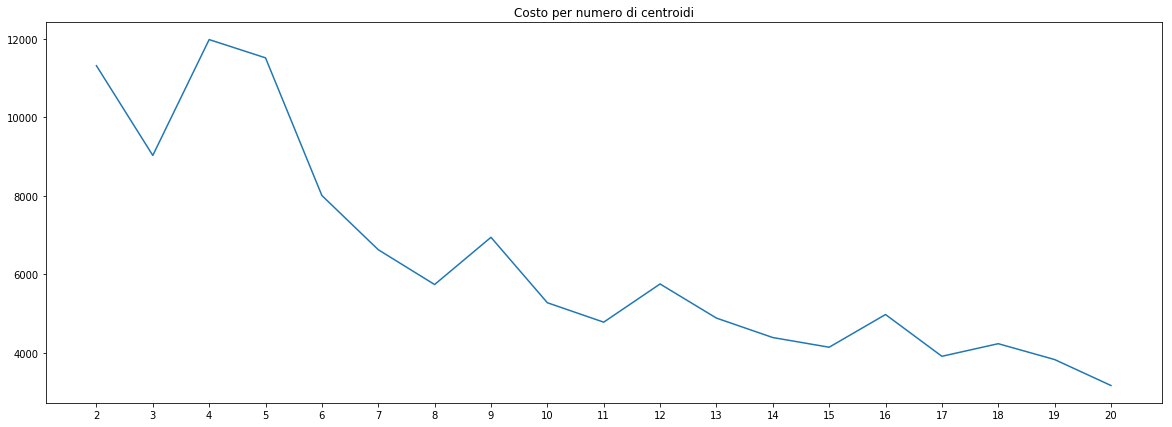

In [36]:
costs_df = pd.DataFrame.from_dict(costs, orient='index')
costs_df.plot(kind='line', title = 'Costo per numero di centroidi', 
              figsize=(20,7), xticks=np.arange(2,size+1), legend=False)

In [55]:
#plt.figure(figsize=(15, 15))
#
#
#ax1 = plt.scatter(x=clusters, y=data['ETA_PRELIEVO'], color='b')   
#ax2 = plt.scatter(x=clusters, y=data['CITO'], color='r') 
#ax2 = plt.scatter(x=clusters, y=data['CITO_PREC'], color='c') 
#ax3 = plt.scatter(x=clusters, y=data['MENOPAUSA'], color='y') 